In [50]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from scipy.linalg import svd

In [2]:
boston = load_boston()

In [48]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
df = pd.DataFrame(data= boston['data'], columns= boston['feature_names'])

In [5]:
#df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
print(df.shape)

(506, 13)


In [7]:
def find_svd(df):
    U = np.linalg.eig(df.dot(df.T))[1]
    eig_val_v, V = np.linalg.eig((df.T).dot(df))
    S = np.diag(np.sqrt(eig_val_v))
    temp = df.shape[0] - S.shape[0]
    temp_mat = np.zeros((temp,df.shape[1]),dtype=float)
    S = np.append(S,temp_mat,axis=0)
    return(U,S,V)

In [8]:
U,S,V = find_svd(df)

In [9]:
U.shape

(506, 506)

In [10]:
S.shape

(506, 13)

In [27]:
type(U)

numpy.ndarray

In [11]:
V.shape

(13, 13)

In [46]:
df2 = (U.dot(S)).dot(V.T)
diff = df-df2
mse = np.sqrt((diff**2).mean(axis=0))

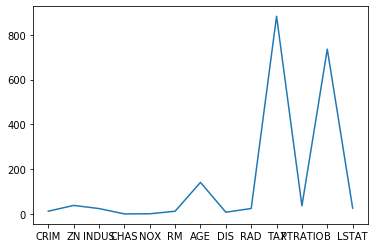

In [51]:
plt.plot(mse)

In [58]:
u1,s1,vt = svd(df)
s = np.diag(np.sqrt(s1))
temp1 = df.shape[0] - s.shape[0]
temp_mat1 = np.zeros((temp1,df.shape[1]),dtype=float)
s = np.append(s,temp_mat1,axis=0)
s.shape

(506, 13)

In [60]:
df3 = (u1.dot(s)).dot(vt)
diff2 = df-df3
mse1 = np.sqrt((diff2**2).mean(axis=0))

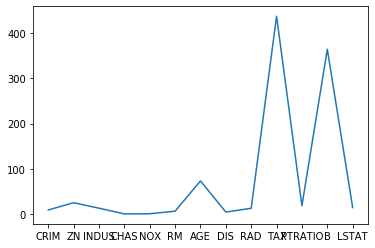

In [61]:
plt.plot(mse1)